In [114]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')

In [4]:
data

,index,longitude,latitude,t,loc_x,o3,o3prod,o3loss,eminox,emivoc,...,pt6_prop,pt7_prop,loc_y,seq,circle,placename,land_earth,land_global,CONTINENT,region
0,13,143.0,-37.0,1.0,142963.0,2.754085e-08,9.992185e-12,2.069842e-12,1.555403e-11,8.936113e-11,...,0.074310,0.008535,14516,6417,143,Australia,1,1,Australia,AUS
1,14,145.0,-37.0,1.0,144963.0,2.669592e-08,1.277102e-11,2.215572e-12,3.737211e-11,1.781655e-10,...,0.019952,0.027364,14606,6507,145,Australia,1,1,Australia,AUS
2,15,147.0,-37.0,1.0,146963.0,2.510329e-08,8.858626e-12,1.947018e-12,1.626616e-11,3.480145e-10,...,0.025903,0.087806,14696,6597,147,Australia,1,1,Australia,AUS
3,2428,143.0,-37.0,2.0,142963.0,2.183056e-08,7.131206e-12,1.323975e-12,1.378624e-11,7.429800e-11,...,0.070814,0.005471,14516,6417,143,Australia,1,1,Australia,AUS
4,2429,145.0,-37.0,2.0,144963.0,2.142809e-08,9.857071e-12,1.406095e-12,3.743589e-11,1.317984e-10,...,0.018933,0.013988,14606,6507,145,Australia,1,1,Australia,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,140953,103.0,25.0,59.0,103025.0,3.105605e-08,1.173194e-11,1.008476e-12,9.193906e-11,1.351426e-10,...,0.003967,0.192898,12747,4648,103,China,1,1,Asia,YYN
9476,143317,101.0,23.0,60.0,101023.0,3.027273e-08,1.016625e-11,1.124656e-12,2.665070e-11,1.221404e-10,...,0.014645,0.304541,12656,4557,101,China,1,1,Asia,YYN
9477,143318,103.0,23.0,60.0,103023.0,2.906724e-08,1.209996e-11,1.130351e-12,4.070348e-11,1.152456e-10,...,0.013181,0.267044,12746,4647,103,China,1,1,Asia,YYN
9478,143367,101.0,25.0,60.0,101025.0,2.749201e-08,8.076709e-12,7.250302e-13,5.260099e-11,9.281040e-11,...,0.006236,0.205789,12657,4558,101,China,1,1,Asia,YYN


#### 1-5. FNR: HCHO/NO${_2}$

In [20]:
data['hcho_no2'] = data['hcho_mole']/data['no2_mole']

data['nox_mole'] = data['no2_mole']+data['no_mole']

data['hno3_mole'] = data['hno3'] *1.01325*10**5/data['tas']*7.243*10**7*10**9
data['pan_mole']  = data['pan'] *1.01325*10**5/data['tas']*7.243*10**7*10**9

data['noz_mole'] = data['hno3_mole']+data['pan_mole']
data['noy_mole'] = data['nox_mole']+data['noz_mole']

data['hcho_noy'] = data['hcho_mole']/data['noy_mole']

data['o3_noy'] = data['o3_mole']/data['noy_mole']
data['o3_noz'] = data['o3_mole']/data['noz_mole']

data['o3_hno3'] = data['o3_mole']/data['hno3_mole']

data['voc_nox'] = data['emivoc']/data['eminox']

In [80]:
inds = data.groupby(['region']).mean()[['hcho_no2','hcho_noy','o3_noy','o3_noz','o3_hno3','voc_nox','LER']]
inds

,hcho_no2,hcho_noy,o3_noy,o3_noz,o3_hno3,voc_nox,LER
region,,,,,,,
AUS,0.442976,0.282332,11.123599,78.348094,104.177807,5.233270,0.003500
BRA,5.869522,3.453524,24.151586,93.137058,453.194832,98.626424,0.002365
BTH,0.047615,0.015405,0.304092,6.004306,6.344929,0.429687,0.000107
CA,0.134980,0.071310,2.316263,16.118406,17.759435,1.086755,0.000808
CCE,0.226974,0.105618,2.598999,9.756110,14.683449,3.022450,0.000468
COD,5.273861,2.704649,16.988368,53.687621,233.760075,86.086558,0.001716
DEU,0.094952,0.054576,2.628061,15.191645,17.000702,0.556930,0.000667
FIN,0.455269,0.230105,12.748106,47.411906,75.970755,3.494706,0.001663
FRA,0.226906,0.131786,5.987069,26.021356,31.295402,1.932617,0.001783


In [81]:
sens = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/region sensitivities.csv')
sens

,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2
0,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649
1,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432
2,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741
3,YYN,1.673687,0.722490,1.303109,0.111641,1.284380,0.8195
4,QTP,3.846261,0.129504,1.263858,0.040323,3.043270,0.9387
5,KOR,-0.118734,0.239789,1.448416,0.076737,-0.081975,0.8943
6,JPN,-0.115629,0.076568,1.353738,0.053426,-0.085415,0.8596
7,GBR,-1.642956,0.112649,2.431756,0.110473,-0.675625,0.8225
8,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047
9,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560


In [82]:
inds = inds.merge(sens, how='left', left_on=['region'], right_on=['Region'])
inds

,hcho_no2,hcho_noy,o3_noy,o3_noz,o3_hno3,voc_nox,LER,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2
0,0.442976,0.282332,11.123599,78.348094,104.177807,5.233270,0.003500,AUS,0.678558,0.138674,0.729637,0.056665,0.929994,0.7189
1,5.869522,3.453524,24.151586,93.137058,453.194832,98.626424,0.002365,BRA,1.039605,0.050838,0.376353,0.101639,2.762317,0.6515
2,0.047615,0.015405,0.304092,6.004306,6.344929,0.429687,0.000107,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649
3,0.134980,0.071310,2.316263,16.118406,17.759435,1.086755,0.000808,CA,-0.437245,0.274061,1.664630,0.067024,-0.262668,0.8040
4,0.226974,0.105618,2.598999,9.756110,14.683449,3.022450,0.000468,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741
5,5.273861,2.704649,16.988368,53.687621,233.760075,86.086558,0.001716,COD,0.388597,0.018685,0.182689,0.144989,2.127096,0.8318
6,0.094952,0.054576,2.628061,15.191645,17.000702,0.556930,0.000667,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560
7,0.455269,0.230105,12.748106,47.411906,75.970755,3.494706,0.001663,FIN,0.159276,0.331664,1.598572,0.108084,0.099636,0.7163
8,0.226906,0.131786,5.987069,26.021356,31.295402,1.932617,0.001783,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047
9,0.237045,0.111089,1.295822,7.481211,8.572826,2.103838,0.000206,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432


In [83]:
inds['ln_hcho_no2'] = np.log(inds['hcho_no2'])
inds['ln_hcho_noy'] = np.log(inds['hcho_noy'])
inds['ln_o3_noy'] = np.log(inds['o3_noy'])
inds['ln_o3_noz'] = np.log(inds['o3_noz'])
inds['ln_o3_hno3'] = np.log(inds['o3_hno3'])
inds['ln_voc_nox'] = np.log(inds['voc_nox'])
inds['ln_LER'] = np.log(inds['LER'])

In [106]:
mod = LinearRegression()
X = inds[['ln_hcho_no2','ln_hcho_noy','ln_voc_nox','ln_LER']]
y = inds['SnSv']
mod.fit(X,y)
y_pred = mod.predict(X)
r2_score(y_pred, y)

0.8107893024403766

In [120]:
mod2 = RandomForestRegressor()
X = inds[['ln_hcho_no2','ln_hcho_noy','ln_o3_noy','ln_o3_noz','ln_voc_nox','ln_LER']]
y = inds['SnSv']
mod2.fit(X,y)
y_pred = mod2.predict(X)
r2_score(y_pred, y)

0.9303231356353293

In [121]:
inds['SnSv_adj'] = y_pred
inds

,hcho_no2,hcho_noy,o3_noy,o3_noz,o3_hno3,voc_nox,LER,Region,Sn,Sn_err,...,SnSv,R2,ln_hcho_no2,ln_hcho_noy,ln_o3_noy,ln_o3_noz,ln_o3_hno3,ln_voc_nox,ln_LER,SnSv_adj
0,0.442976,0.282332,11.123599,78.348094,104.177807,5.233270,0.003500,AUS,0.678558,0.138674,...,0.929994,0.7189,-0.814240,-1.264670,2.409069,4.361162,4.646099,1.655036,-5.655117,1.049570
1,5.869522,3.453524,24.151586,93.137058,453.194832,98.626424,0.002365,BRA,1.039605,0.050838,...,2.762317,0.6515,1.769773,1.239395,3.184350,4.534072,6.116322,4.591339,-6.046975,2.417502
2,0.047615,0.015405,0.304092,6.004306,6.344929,0.429687,0.000107,BTH,-9.901132,0.183759,...,-2.035977,0.8649,-3.044608,-4.173081,-1.190424,1.792477,1.847656,-0.844698,-9.146447,-1.607389
3,0.134980,0.071310,2.316263,16.118406,17.759435,1.086755,0.000808,CA,-0.437245,0.274061,...,-0.262668,0.8040,-2.002629,-2.640718,0.839955,2.779962,2.876917,0.083196,-7.121467,-0.210824
4,0.226974,0.105618,2.598999,9.756110,14.683449,3.022450,0.000468,CCE,0.344900,0.084865,...,0.285367,0.8741,-1.482919,-2.247928,0.955126,2.277894,2.686721,1.106068,-7.666167,0.181287
5,5.273861,2.704649,16.988368,53.687621,233.760075,86.086558,0.001716,COD,0.388597,0.018685,...,2.127096,0.8318,1.662763,0.994972,2.832529,3.983182,5.454295,4.455353,-6.368006,1.849077
6,0.094952,0.054576,2.628061,15.191645,17.000702,0.556930,0.000667,DEU,-1.182926,0.282724,...,-0.591178,0.8560,-2.354382,-2.908154,0.966246,2.720746,2.833255,-0.585315,-7.313241,-0.642820
7,0.455269,0.230105,12.748106,47.411906,75.970755,3.494706,0.001663,FIN,0.159276,0.331664,...,0.099636,0.7163,-0.786868,-1.469220,2.545383,3.858873,4.330348,1.251249,-6.399202,0.381985
8,0.226906,0.131786,5.987069,26.021356,31.295402,1.932617,0.001783,FRA,0.466664,0.080890,...,0.455327,0.7047,-1.483220,-2.026578,1.789602,3.258918,3.443471,0.658875,-6.329247,0.661291
9,0.237045,0.111089,1.295822,7.481211,8.572826,2.103838,0.000206,GBA,0.147599,0.099539,...,0.098561,0.9432,-1.439504,-2.197426,0.259145,2.012395,2.148597,0.743763,-8.486251,0.080557


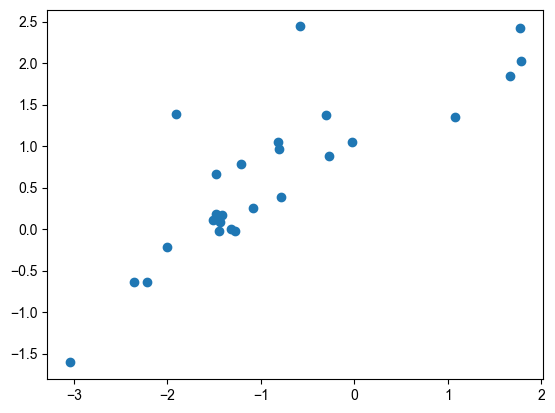

In [127]:
plt.scatter(inds['ln_hcho_no2'], inds['SnSv_adj'])

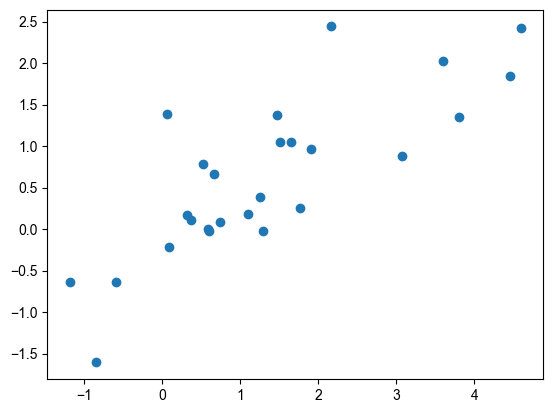

In [123]:
plt.scatter(inds['ln_voc_nox'], inds['SnSv_adj'])

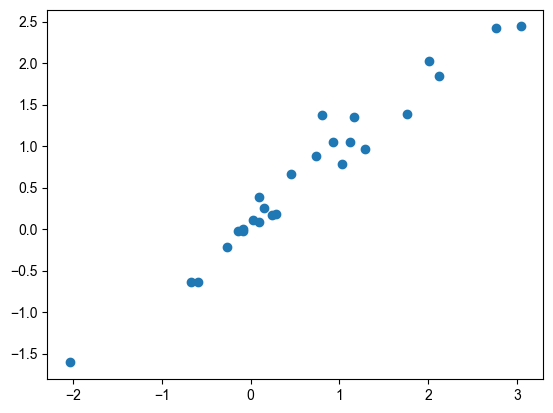

In [124]:
plt.scatter(inds['SnSv'], inds['SnSv_adj'])

#### Calculate the lumped equivalency ratios

In [100]:
list(data)

['index',
 'longitude',
 'latitude',
 't',
 'loc_x',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'ps',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'co',
 'hcho',
 'ch4',
 'ch3o2_mod',
 'ho2_mod',
 'o1d_mod',
 'o3_mole',
 'no2_mole',
 'no_mole',
 'h2o_mole',
 'co_mole',
 'hcho_mole',
 'oh_mole',
 'n2_mole',
 'o2_mole',
 'lossco_mole',
 'lossch4_mole',
 'o1d_mole',
 'ho2_mole',
 'ch3o2_mole',
 'ch3ooh_mole',
 'o1d_mod_vmr',
 'ho2_mod_vmr',
 'ch3o2_mod_vmr',
 'o1d_vmr',
 'ho2_vmr',
 'ch3o2_vmr',
 'o1d_mod_mole',
 'ho2_mod_mole',
 'ch3o2_mod_mole',
 'o1d_mole_adj',
 'ho2_mole_adj',
 'ch3o2_mole_adj',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k9a',
 'k9b',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k15a',
 'k15b',
 'k16',
 'pt1',
 'pt2',
 'pt4',
 'pt5',
 'pt6',
 'o3prod_mole',
 'o3loss_mole',
 'pt3',
 'pt7',
 'pt3_adj',
 'pt7_adj',
 'o3prod_mole_adj',
 'o3los

In [101]:
data['pt3_total'] = data['o3prod_mole_stacked'] - data['pt1'] - data['pt2']
data['pt7_total'] = data['o3loss_mole_stacked'] - data['pt4'] - data['pt5'] - data['pt6']

In [102]:
data['EtOO_eq'] = data['pt3_total']/data['k18']/data['no_mole']
data['ISOP_eq'] = data['pt7_total']/data['k27']/data['o3_mole']

In [103]:
data['LER'] = data['EtOO_eq']/data['ISOP_eq']

In [104]:
ler = data.groupby(['region']).mean()[['LER']]
ler

,LER
region,
AUS,0.003500
BRA,0.002365
BTH,0.000107
CA,0.000808
CCE,0.000468
COD,0.001716
DEU,0.000667
FIN,0.001663
FRA,0.001783


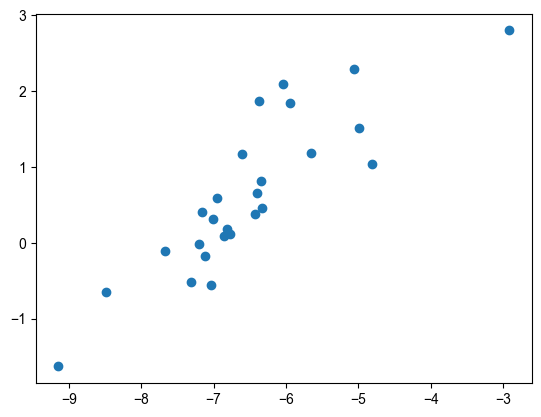

In [113]:
plt.scatter(inds['ln_LER'], inds['SnSv_adj'])

In [154]:
ext = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/region dynamic indicators.csv')
ext

,ABBR,∂[OH]/∂[HO2],∂[HO2]/∂[OH],∂[CH3O2]/∂[OH],∂[HO2]/∂[OH]/[O3],∂[OH]/∂[HO2]*[O3],o3
0,BTH,0.962423,0.281922,0.032699,0.012633,21.478,22.32
1,GBA,0.148226,1.375367,0.159336,0.042720,4.772,32.20
2,CCE,0.066035,1.170644,0.095569,0.033880,2.282,34.55
3,YYN,0.060690,2.898264,0.397886,0.072236,2.435,40.12
4,QTP,0.060377,4.090988,0.905716,0.076823,3.215,53.25
5,KOR,0.084173,6.620707,1.138212,0.174006,3.203,38.05
6,JPN,0.084889,3.192535,0.497475,0.086973,3.116,36.71
7,GBR,0.205846,3.033261,0.828510,0.101798,6.134,29.80
8,FRA,0.133097,5.012556,1.277960,0.161399,4.134,31.06
9,DEU,0.347008,2.561511,0.641043,0.097999,9.070,26.14


In [156]:
inds = inds.merge(ext, how='left', left_on=['Region'], right_on=['ABBR'])
inds

,hcho_no2,hcho_noy,o3_noy,o3_noz,o3_hno3,voc_nox,LER,Region,Sn,Sn_err,...,∂[HO2]/∂[OH]_x,∂[CH3O2]/∂[OH]_x,∂[HO2]/∂[OH]/[O3]_x,ABBR_y,∂[OH]/∂[HO2]_y,∂[HO2]/∂[OH]_y,∂[CH3O2]/∂[OH]_y,∂[HO2]/∂[OH]/[O3]_y,∂[OH]/∂[HO2]*[O3],o3
0,0.442976,0.282332,11.123599,78.348094,104.177807,5.233270,0.003500,AUS,0.678558,0.138674,...,8.305997,2.721709,0.37,AUS,0.060796,8.305997,2.721709,0.365523,1.382,22.72
1,5.869522,3.453524,24.151586,93.137058,453.194832,98.626424,0.002365,BRA,1.039605,0.050838,...,34.796960,8.248690,1.61,BRA,0.023308,34.796960,8.248690,1.612063,0.503,21.59
2,0.047615,0.015405,0.304092,6.004306,6.344929,0.429687,0.000107,BTH,-9.901132,0.183759,...,0.281922,0.032699,0.01,BTH,0.962423,0.281922,0.032699,0.012633,21.478,22.32
3,0.134980,0.071310,2.316263,16.118406,17.759435,1.086755,0.000808,CA,-0.437245,0.274061,...,2.777202,0.653918,0.08,CA,0.259529,2.777202,0.653918,0.082711,8.714,33.58
4,0.226974,0.105618,2.598999,9.756110,14.683449,3.022450,0.000468,CCE,0.344900,0.084865,...,1.170644,0.095569,0.03,CCE,0.066035,1.170644,0.095569,0.033880,2.282,34.55
5,5.273861,2.704649,16.988368,53.687621,233.760075,86.086558,0.001716,COD,0.388597,0.018685,...,24.983630,0.226906,0.84,COD,0.005910,24.983630,0.226906,0.840762,0.176,29.72
6,0.094952,0.054576,2.628061,15.191645,17.000702,0.556930,0.000667,DEU,-1.182926,0.282724,...,2.561511,0.641043,0.10,DEU,0.347008,2.561511,0.641043,0.097999,9.070,26.14
7,0.455269,0.230105,12.748106,47.411906,75.970755,3.494706,0.001663,FIN,0.159276,0.331664,...,14.347110,3.846293,0.60,FIN,0.048126,14.347110,3.846293,0.599217,1.152,23.94
8,0.226906,0.131786,5.987069,26.021356,31.295402,1.932617,0.001783,FRA,0.466664,0.080890,...,5.012556,1.277960,0.16,FRA,0.133097,5.012556,1.277960,0.161399,4.134,31.06
9,0.237045,0.111089,1.295822,7.481211,8.572826,2.103838,0.000206,GBA,0.147599,0.099539,...,1.375367,0.159336,0.04,GBA,0.148226,1.375367,0.159336,0.042720,4.772,32.20


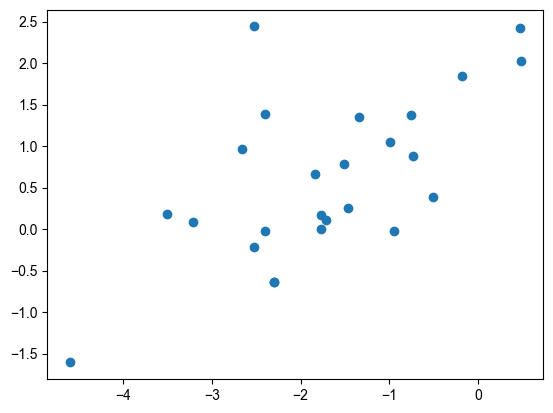

In [145]:
plt.scatter(np.log(inds['∂[HO2]/∂[OH]/[O3]']), inds['SnSv_adj'])

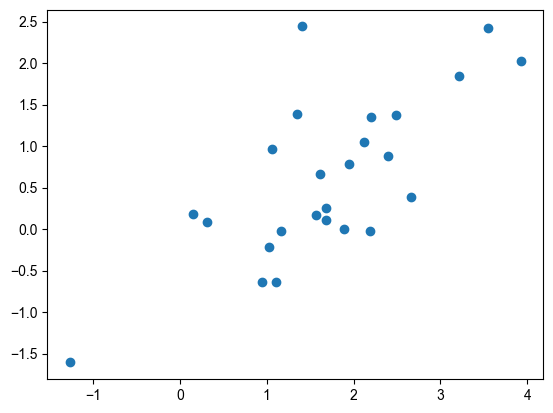

In [146]:
plt.scatter(np.log(inds['∂[HO2]/∂[OH]']), inds['SnSv_adj'])

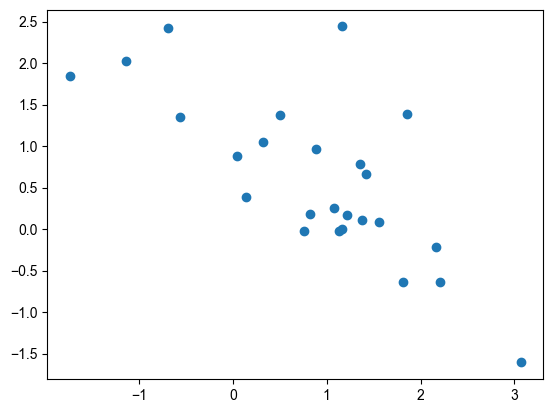

In [157]:
plt.scatter(np.log(inds['∂[OH]/∂[HO2]*[O3]']), inds['SnSv_adj'])

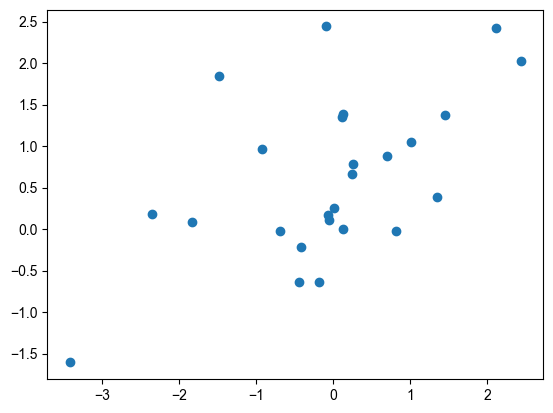

In [147]:
plt.scatter(np.log(inds['∂[CH3O2]/∂[OH]']), inds['SnSv_adj'])

In [153]:
data['o3'].mean()

3.5355558148396646e-08

In [149]:
data['ch4'].mean()

1.8145415492616006e-06

In [150]:
data['hcho'].mean()

1.3321952456393467e-09

In [160]:
y.shape

(26,)

In [164]:
mod = LinearRegression()
X = inds[['ln_hcho_no2']]
y = inds['SnSv']
mod.fit(X,y)
y_pred = mod.predict(X)
r2_score(y_pred, y)

import statsmodels.api as sm
ols = sm.OLS(y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.HC0_se

ln_hcho_no2    0.154419
dtype: float64

In [166]:
X.mean()

ln_hcho_no2   -0.865036
dtype: float64